# <span style="color:blue"> Red Neuronal con Keras e Iris dataset 

In [8]:
import os
import numpy
import pandas
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.utils import np_utils
from keras.models import Sequential

from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score

from sklearn.model_selection import train_test_split

weights_name = "weights.hdf5"
numpy.random.seed(0)

### <span style="color:blue"> 1. Cargar el dataset </span>

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values

X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

Con <b>train_test_split</b> podemos dividir todo el dataset en **training** y **test** sets:

In [3]:
X_train, X_test, y_train, y_test = \
          train_test_split(X, Y, test_size=0.2, random_state=42)

### <span style="color:blue">2.  Preprocesar las labels

In [4]:
# Con LabelEncoder encontramos cuantos valores diferentes hay en Y
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)

In [5]:
encoded_y_train[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

In [6]:
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)

# to_categorical convierte las labels en un one-hot vector
y_train = np_utils.to_categorical(encoded_y_train)
y_test = np_utils.to_categorical(encoded_y_test)

y_train[:3]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### <span style="color:blue"> 3. Crear el modelo

La siguiente red neuronal tendrá la forma **4-10-10-3**

In [7]:
# Elegimos el tipo de modelo
model = Sequential()

# Añadimos las layers
model.add(Dense(4, input_dim=4, init='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printa el resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


/home/aolmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, input_dim=4, activation="relu", kernel_initializer="normal")`
  """


### <span style="color:blue"> 4. Entrenar el modelo con el training set

In [9]:
history = model.fit(X_train, y_train, epochs=200, batch_size=5)
# model.save_weights(weights_name)

Epoch 1/200
120/120 [==============================] - 0s - loss: 1.0991 - acc: 0.5333     
Epoch 2/200
120/120 [==============================] - 0s - loss: 1.0966 - acc: 0.6667     
Epoch 3/200
120/120 [==============================] - 0s - loss: 1.0927 - acc: 0.6750     
Epoch 4/200
120/120 [==============================] - 0s - loss: 1.0818 - acc: 0.6750     
Epoch 5/200
120/120 [==============================] - 0s - loss: 1.0657 - acc: 0.6750     
Epoch 6/200
120/120 [==============================] - 0s - loss: 1.0386 - acc: 0.6750     
Epoch 7/200
120/120 [==============================] - 0s - loss: 1.0001 - acc: 0.6750     
Epoch 8/200
120/120 [==============================] - 0s - loss: 0.9457 - acc: 0.6750     
Epoch 9/200
120/120 [==============================] - 0s - loss: 0.8712 - acc: 0.6750     
Epoch 10/200
120/120 [==============================] - 0s - loss: 0.7834 - acc: 0.6750     
Epoch 11/200
120/120 [==============================] - 0s - loss: 0.6880 - acc

120/120 [==============================] - 0s - loss: 0.0822 - acc: 0.9667     
Epoch 90/200
120/120 [==============================] - 0s - loss: 0.0710 - acc: 0.9750     
Epoch 91/200
120/120 [==============================] - 0s - loss: 0.0684 - acc: 0.9750     
Epoch 92/200
120/120 [==============================] - 0s - loss: 0.0758 - acc: 0.9667     
Epoch 93/200
120/120 [==============================] - 0s - loss: 0.0834 - acc: 0.9583     
Epoch 94/200
120/120 [==============================] - 0s - loss: 0.0654 - acc: 0.9750     
Epoch 95/200
120/120 [==============================] - 0s - loss: 0.0840 - acc: 0.9667     
Epoch 96/200
120/120 [==============================] - 0s - loss: 0.0756 - acc: 0.9667     
Epoch 97/200
120/120 [==============================] - 0s - loss: 0.0642 - acc: 0.9667     
Epoch 98/200
120/120 [==============================] - 0s - loss: 0.0613 - acc: 0.9750     
Epoch 99/200
120/120 [==============================] - 0s - loss: 0.0706 - acc: 0.

120/120 [==============================] - 0s - loss: 0.0575 - acc: 0.9833     
Epoch 176/200
120/120 [==============================] - 0s - loss: 0.0583 - acc: 0.9833     
Epoch 177/200
120/120 [==============================] - 0s - loss: 0.0688 - acc: 0.9750     
Epoch 178/200
120/120 [==============================] - 0s - loss: 0.0662 - acc: 0.9750     
Epoch 179/200
120/120 [==============================] - 0s - loss: 0.0762 - acc: 0.9583     
Epoch 180/200
120/120 [==============================] - 0s - loss: 0.0637 - acc: 0.9750     
Epoch 181/200
120/120 [==============================] - 0s - loss: 0.0847 - acc: 0.9500     
Epoch 182/200
120/120 [==============================] - 0s - loss: 0.0613 - acc: 0.9833     
Epoch 183/200
120/120 [==============================] - 0s - loss: 0.0794 - acc: 0.9750     
Epoch 184/200
120/120 [==============================] - 0s - loss: 0.0757 - acc: 0.9667         
Epoch 185/200
120/120 [==============================] - 0s - loss: 0.

### <span style="color:blue">5. Evaluar el modelo con el test set y graficar

In [11]:
print(y_test.shape)
score = model.evaluate(X_test, y_test)
print("Loss:", score[0])
print("Accuracy: {}%".format(score[1] * 100))

(30, 3)
30/30 [==============================] - 0s
Loss: 0.0479995273054
Accuracy: 100.0%


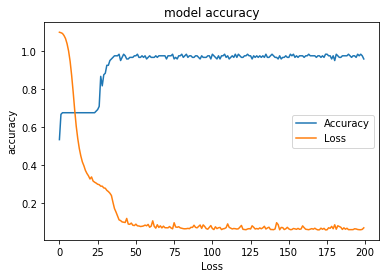

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy', 'Loss'], loc='center right')
plt.show()